## Loading Data

In [1]:
import pandas as pd
train = pd.read_csv("C:/Users/EL-WAZIR/Downloads/Titanic competation/train.csv")
test = pd.read_csv("C:/Users/EL-WAZIR/Downloads/Titanic competation/test.csv")

## Exploratory Data Analysis - EDA

In [2]:
print(train.info())            
print(train.head())      
print(train.describe())
print(train.isnull().sum()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                      

## Data Cleaning & Preprocessing

In [3]:
train['Cabin'] = train.groupby(['Embarked', 'Pclass'])['Cabin'].transform(lambda x: x.fillna(pd.Series.mode(x).iloc[0] if not x.mode().empty else np.nan))
train['Age'].fillna(train['Age'].mean(), inplace=True)

In [4]:
drop_columns = ['PassengerId', 'Name', 'Ticket']
train = train.drop(columns=drop_columns)
test = test.drop(columns=drop_columns)
print(train.head())
print(test.head())

   Survived  Pclass     Sex   Age  SibSp  Parch     Fare Cabin Embarked
0         0       3    male  22.0      1      0   7.2500    G6        S
1         1       1  female  38.0      1      0  71.2833   C85        C
2         1       3  female  26.0      0      0   7.9250    G6        S
3         1       1  female  35.0      1      0  53.1000  C123        S
4         0       3    male  35.0      0      0   8.0500    G6        S
   Pclass     Sex   Age  SibSp  Parch     Fare Cabin Embarked
0       3    male  34.5      0      0   7.8292   NaN        Q
1       3  female  47.0      1      0   7.0000   NaN        S
2       2    male  62.0      0      0   9.6875   NaN        Q
3       3    male  27.0      0      0   8.6625   NaN        S
4       3  female  22.0      1      1  12.2875   NaN        S


## Survival Rate Analysis by Gender

In [5]:
Women=train.loc[train.Sex=='female']["Survived"]
Rate_Women=sum(Women)/len(Women)
print(f"Rate of women survived is: {Rate_Women}")

Rate of women survived is: 0.7420382165605095


In [6]:
Men=train.loc[train.Sex=='male']["Survived"]
Rate_men=sum(Men)/len(Men)
print(f"Rate of Men survived is: {Rate_men}")

Rate of Men survived is: 0.18890814558058924


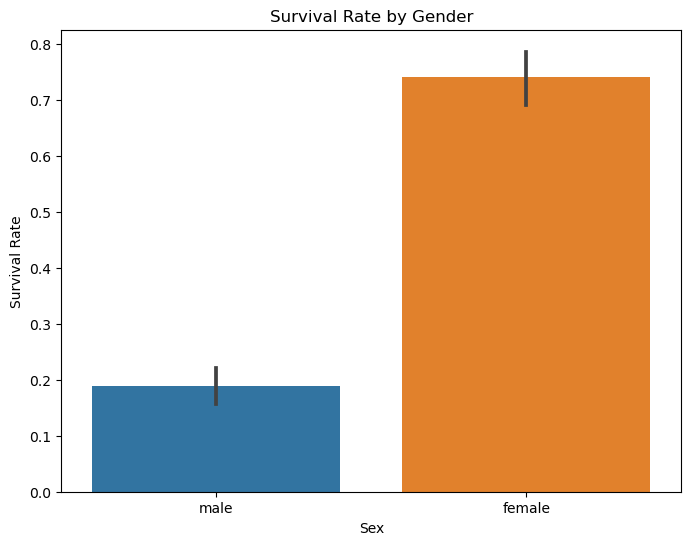

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.barplot(x='Sex', y='Survived', data=train)
plt.title('Survival Rate by Gender')
plt.ylabel('Survival Rate')
plt.show()

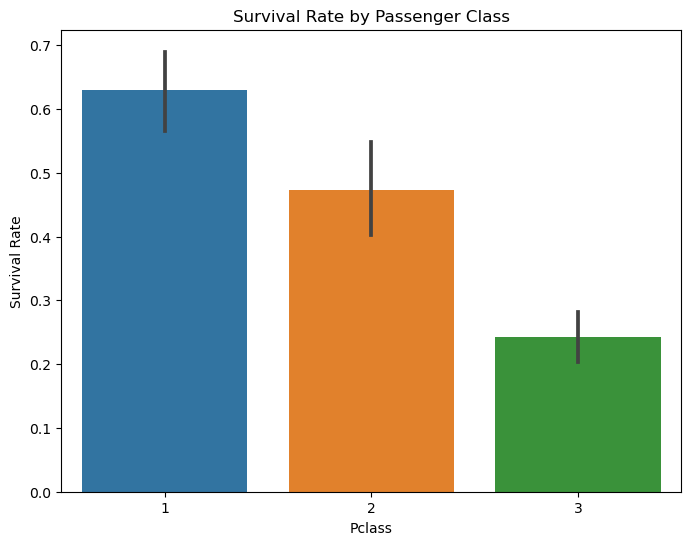

In [8]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Pclass', y='Survived', data=train)
plt.title('Survival Rate by Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

## Data Preparation for Modeling

In [10]:
y = train["Survived"]
features = ['Pclass','Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Cabin', 'Embarked']
X = pd.get_dummies(train[features])
X_test = pd.get_dummies(test[features])

## Data Splitting for Training and Validation

In [10]:
from sklearn.model_selection import train_test_split
train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=0.2, random_state=1)

## Model Building and Training

In [12]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=1)
model.fit(train_X, train_y)

RandomForestClassifier(random_state=1)

## Prediction and Model Evaluation

In [13]:
val_predictions = model.predict(val_X)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(val_y, val_predictions)
print(f"Validation Accuracy: {accuracy}")

Validation Accuracy: 0.7877094972067039
